# CNN Example: notMNIST dataset 

The [notMNIST](http://yaroslavvb.blogspot.com.br/2011/09/notmnist-dataset.html) dataset is a example similar to MNIST. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes).

In [17]:
import os
import sys
import tensorflow as tf
import inspect
import matplotlib.pyplot as plt
import numpy as np
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from util import get_data_4d, plot9images,randomize_in_place
from CNN import CNNModel, train_model,check_test,one_prediction
from DataHolder import DataHolder
from Config import Config


### Importing all the data

In [2]:
train_dataset, train_labels, valid_dataset, valid_labels, test_dataset, test_labels = get_data_4d()
print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Training: (200000, 28, 28, 1) (200000, 10)
Validation: (10000, 28, 28, 1) (10000, 10)
Testing: (10000, 28, 28, 1) (10000, 10)


### Visualizing some examples

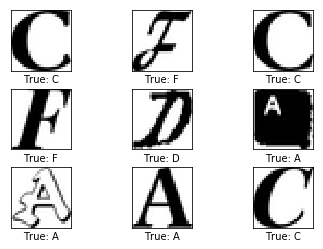

In [3]:
train_classes = np.argmax(train_labels, axis=1)
train_classes = [chr(i + ord('A')) for i in train_classes]
img_size = 28
img_shape = (img_size, img_size)
images = train_dataset[0:9]
cls_true = train_classes[0:9]
plot9images(images, cls_true, img_shape)  

## The hyperparameters of the model are

In [10]:
my_config = Config()
print("batch_size = {}".format(my_config.batch_size))
print("patch_size = {}".format(my_config.patch_size))
print("image_size = {}".format(my_config.image_size))
print("num_labels = {}".format(my_config.num_labels))
print("num_channels = {}".format(my_config.num_channels))
print("num_filters_1 = {}".format(my_config.num_filters_1))
print("num_filters_2 = {}".format(my_config.num_filters_2))
print("hidden_nodes_1 = {}".format(my_config.hidden_nodes_1))
print("hidden_nodes_2 = {}".format(my_config.hidden_nodes_2))
print("hidden_nodes_3 = {}".format(my_config.hidden_nodes_3))
print("learning_rate = {}".format(my_config.learning_rate))
print("steps_for_decay = {}".format(my_config.steps_for_decay))
print("decay_rate = {}".format(my_config.decay_rate))

batch_size = 140
patch_size = 5
image_size = 28
num_labels = 10
num_channels = 1
num_filters_1 = 16
num_filters_2 = 32
hidden_nodes_1 = 60
hidden_nodes_2 = 40
hidden_nodes_3 = 20
learning_rate = 0.9
steps_for_decay = 100
decay_rate = 0.96


## Now, training the model using 10001 steps

In [14]:
my_dataholder = DataHolder(train_dataset,
                           train_labels,
                           valid_dataset,
                           valid_labels,
                           test_dataset,
                           test_labels)
my_model = CNNModel(my_config, my_dataholder)
train_model(my_model, my_dataholder, num_steps=10001, show_step=1000)

Start training
Minibatch loss at step 0: 2.315698
Minibatch accuracy: 12.14%
Test accuracy: 10.00%*
Duration: 0.522 sec
Minibatch loss at step 1000: 0.379443
Minibatch accuracy: 87.14%
Test accuracy: 94.13%*
Duration: 0.113 sec
Minibatch loss at step 2000: 0.320652
Minibatch accuracy: 91.43%
Test accuracy: 94.78%*
Duration: 0.098 sec
Minibatch loss at step 3000: 0.374173
Minibatch accuracy: 87.14%
Test accuracy: 95.74%*
Duration: 0.099 sec
Minibatch loss at step 4000: 0.338099
Minibatch accuracy: 90.71%
Test accuracy: 95.69%
Duration: 0.098 sec
Minibatch loss at step 5000: 0.312986
Minibatch accuracy: 89.29%
Test accuracy: 96.06%*
Duration: 0.094 sec
Minibatch loss at step 6000: 0.298959
Minibatch accuracy: 90.71%
Test accuracy: 96.22%*
Duration: 0.092 sec
Minibatch loss at step 7000: 0.234543
Minibatch accuracy: 92.86%
Test accuracy: 96.24%*
Duration: 0.099 sec
Minibatch loss at step 8000: 0.197667
Minibatch accuracy: 92.86%
Test accuracy: 96.21%
Duration: 0.098 sec
Minibatch loss at 

## Cheking the trained model with the test dataset

In [18]:
print("Test accuracy: %.2f%%" % (check_test(my_model) * 100))

Test accuracy: 96.38%


## Seeing the model perform in 9 images from the valid dataset

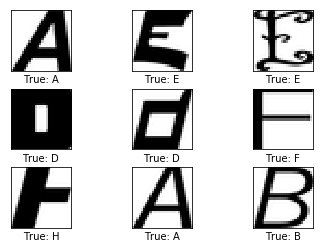

In [21]:
randomize_in_place(valid_dataset, valid_labels, 0)
valid_classes = np.argmax(valid_labels, axis=1)
valid_classes = [chr(i + ord('A')) for i in valid_classes]
cls_true = valid_classes[0:9]
images = valid_dataset[0:9]
images = [image.reshape(1,
                        image.shape[0],
                        image.shape[1],
                        image.shape[2]) for image in images]
predictions = [chr(one_prediction(my_model, image) + ord('A')) for image in images]
plot9images(images, cls_true, img_shape)  
